In [1]:
import blocksci
import collections
import pandas as pd
import numpy as np
from pathlib import Path


parser_data_directory = Path("/mnt/anal/config.json")
cluster_directory = Path("/mnt/anal/cluster/")
dumplings_directory = Path("/mnt/dumplings/")

chain = blocksci.Blockchain(str(parser_data_directory))

from typing import Tuple

def get_block_height_for_date(date: str) -> int:
    return chain.range(date)[0].height

def get_block_height_range(start: str, end: str) -> Tuple[int, int]:
    return get_block_height_for_date(start), get_block_height_for_date(end)


import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

def compute_log_log_graph(arr):
    cluster_sizes = np.array(list(map(lambda c: c.address_count(), arr)))
    
    # Filter out non-positive values
    cluster_sizes = cluster_sizes[cluster_sizes > 0]
    
    # Create logarithmically spaced bins
    bins = np.logspace(np.log10(cluster_sizes.min()), np.log10(cluster_sizes.max()), num=50)
    
    # Compute the histogram data
    hist, bin_edges = np.histogram(cluster_sizes, bins=bins)
    
    # Replace zero counts with NaN to avoid log scale issues
    hist = np.where(hist == 0, np.nan, hist)
    
    # Compute the bin centers
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    
    plt.figure(figsize=(12, 6))
    
    # Plot the histogram as a smooth line
    plt.plot(bin_centers, hist, marker='o')
    
    # Set both axes to logarithmic scale
    plt.xscale('log')
    plt.yscale('log')
    
    plt.title('Cluster Size Distribution (Line Plot with Log-Log Scale)')
    plt.xlabel('Cluster Size (Log Scale)')
    plt.ylabel('Frequency (Log Scale)')
    
    plt.grid(True, which="both", ls="--", linewidth=0.5)
    plt.show()


# Wasabi2 clusters

In [3]:
# import random

one_random_wp_cj = chain.tx_with_hash("9ea3e5d217c76e6be6ace7fe4fb3622976103466de81d2b02cd87c54f9e91a2f")
# one_random_wp_cj = chain.tx_with_hash("00ab23721356a159b695060b3975469fa0703e55398e9123ef59d2a5b94b1058")
address_im_looking_for = one_random_wp_cj.outputs[1].spending_tx.outputs[0].address
print(address_im_looking_for)

start = one_random_wp_cj.block_height
stop = one_random_wp_cj.block_height + 1

start = 0
stop = len(chain)

# clusterer = blocksci.cluster.ClusterManager(str(cluster_directory / "fr"), chain)

%time clusterer = blocksci.cluster.CoinjoinClusterManager.create_clustering(  \
    chain=chain, \
    start=start, \
    stop=stop, \
    output_path="/mnt/anal/clustering/wasabi2_out_threshold/", \
    overwrite=True, \
    coinjoin_type="wasabi2", \
    heuristics=["OneOutputConsolidation", "OneInputConsolidation", "TwoHopOutputThresholdConsolidation", "ThreeHopOutputThresholdConsolidation"] \
)


bc1qxvsjlwnrhel0elpcv0tmhflrxl7t7hphgau3pf
Using heuristic: None
Using heuristic: OneOutputConsolidation
Using heuristic: OneInputConsolidation
Using heuristic: TwoHopOutputThresholdConsolidation
Using heuristic: ThreeHopOutputThresholdConsolidation
Collected 15858241 addresses
Creating disjoint sets of size 15858241
Created disjoint sets of size 15858241
Preparing to serialize cluster data
Serializing cluster data
Serialized
CPU times: user 5min 57s, sys: 1min 17s, total: 7min 15s
Wall time: 1min 13s


CPU times: user 7.95 s, sys: 2.84 s, total: 10.8 s
Wall time: 10.8 s


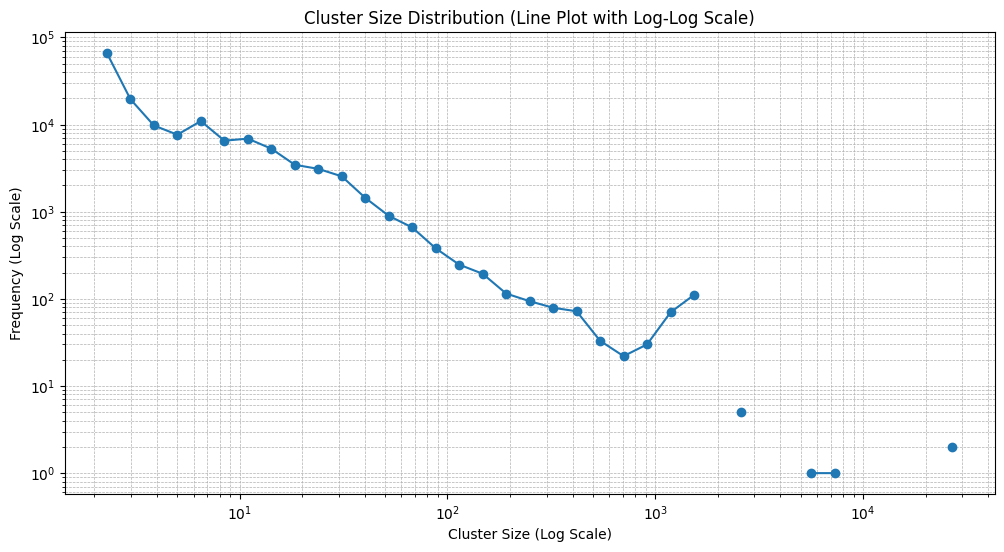

In [4]:
ww2_clusterer = blocksci.cluster.CoinjoinClusterManager("/mnt/anal/clustering/wasabi2_out_threshold/", chain)
%time ww2_clusters = [cluster for cluster in ww2_clusterer.clusters() if cluster.address_count() > 1]
compute_log_log_graph(ww2_clusters)

# Whirlpool clusters
`9ea3e5d217c76e6be6ace7fe4fb3622976103466de81d2b02cd87c54f9e91a2f` should have 21 clustered addresses by the simple one output heuristics
`00ab23721356a159b695060b3975469fa0703e55398e9123ef59d2a5b94b1058` should have 567 addresses clustered

In [4]:
# import random

one_random_wp_cj = chain.tx_with_hash("9ea3e5d217c76e6be6ace7fe4fb3622976103466de81d2b02cd87c54f9e91a2f")
one_random_wp_cj = chain.tx_with_hash("00ab23721356a159b695060b3975469fa0703e55398e9123ef59d2a5b94b1058")
one_random_wp_cj = chain.tx_with_hash("021dc91d5d9d74babeed5dbf12a6287cbc4a46317afa357b45c46776940cf902")
address_im_looking_for = one_random_wp_cj.outputs[1].spending_tx.outputs[0].address
print(address_im_looking_for)

start = one_random_wp_cj.block_height
stop = one_random_wp_cj.block_height + 91302

start = 0
stop = len(chain)

# clusterer = blocksci.cluster.ClusterManager(str(cluster_directory / "fr"), chain)

%time clusterer = blocksci.cluster.CoinjoinClusterManager.create_clustering(  \
    chain=chain, \
    start=start, \
    stop=stop, \
    output_path="/mnt/anal/clustering/whirlpool_out_threshold/", \
    overwrite=True, \
    coinjoin_type="whirlpool", \
    heuristics=["OneOutputConsolidation", "OneInputConsolidation", "TwoHopOutputThresholdConsolidation", "ThreeHopOutputThresholdConsolidation"] \
)


bc1qttdxayfzyup2gaw4dkdjz0smlwylmtzpy6a3e9
Using heuristic: None
Using heuristic: OneOutputConsolidation
Using heuristic: OneInputConsolidation
Using heuristic: TwoHopOutputThresholdConsolidation
Using heuristic: ThreeHopOutputThresholdConsolidation
Collected 5135482 addresses
Creating disjoint sets of size 5135482
Created disjoint sets of size 5135482
Preparing to serialize cluster data
Serializing cluster data
Serialized
CPU times: user 12min 58s, sys: 17.5 s, total: 13min 15s
Wall time: 42.8 s


CPU times: user 2.68 s, sys: 524 ms, total: 3.21 s
Wall time: 3.22 s


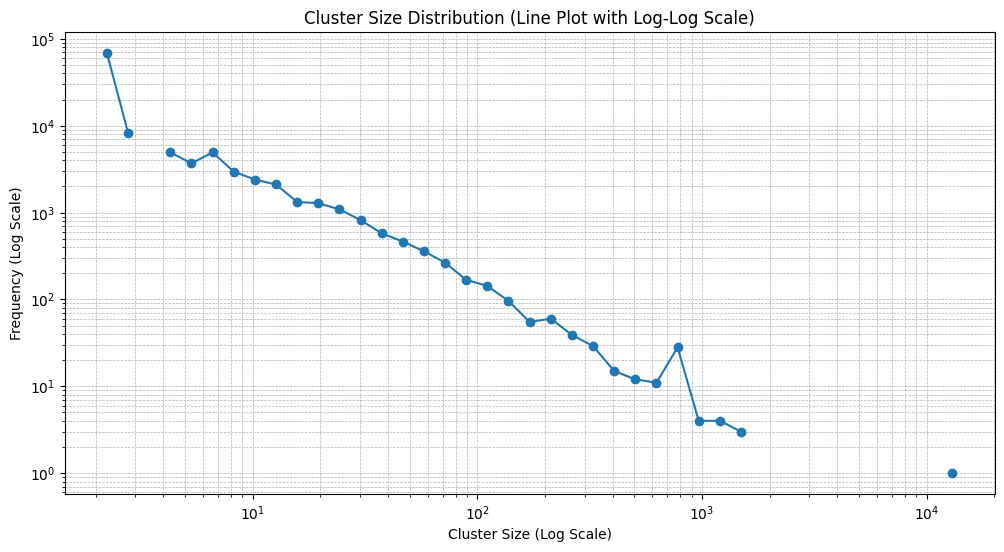

In [5]:
wp_clusterer = blocksci.cluster.CoinjoinClusterManager("/mnt/anal/clustering/whirlpool_out_threshold/", chain)
%time wp_clusters = [cluster for cluster in wp_clusterer.clusters() if cluster.address_count() > 1]
compute_log_log_graph(wp_clusters)

# Wasabi1 clustering


In [5]:
# import random

# one_random_wp_cj = chain.tx_with_hash("9ea3e5d217c76e6be6ace7fe4fb3622976103466de81d2b02cd87c54f9e91a2f")
# one_random_wp_cj = chain.tx_with_hash("00ab23721356a159b695060b3975469fa0703e55398e9123ef59d2a5b94b1058")
#address_im_looking_for = one_random_wp_cj.outputs[1].spending_tx.outputs[0].address
# print(address_im_looking_for)

start = one_random_wp_cj.block_height
stop = one_random_wp_cj.block_height + 1

start = 0
stop = len(chain)

%time clusterer = blocksci.cluster.CoinjoinClusterManager.create_clustering(  \
    chain=chain, \
    start=start, \
    stop=stop, \
    output_path="/mnt/anal/clustering/wasabi1_out_threshold/", \
    overwrite=True, \
    coinjoin_type="wasabi1", \
    heuristics=["OneOutputConsolidation", "OneInputConsolidation", "TwoHopOutputThresholdConsolidation", "ThreeHopOutputThresholdConsolidation"] \
)


Using heuristic: None
Using heuristic: OneOutputConsolidation
Using heuristic: OneInputConsolidation
Using heuristic: TwoHopOutputThresholdConsolidation
Using heuristic: ThreeHopOutputThresholdConsolidation
Collected 10213510 addresses
Creating disjoint sets of size 10213510
Created disjoint sets of size 10213510
Preparing to serialize cluster data
Serializing cluster data
Serialized
CPU times: user 3h 51min 49s, sys: 1min 3s, total: 3h 52min 53s
Wall time: 9min


CPU times: user 4.24 s, sys: 1.56 s, total: 5.79 s
Wall time: 5.82 s


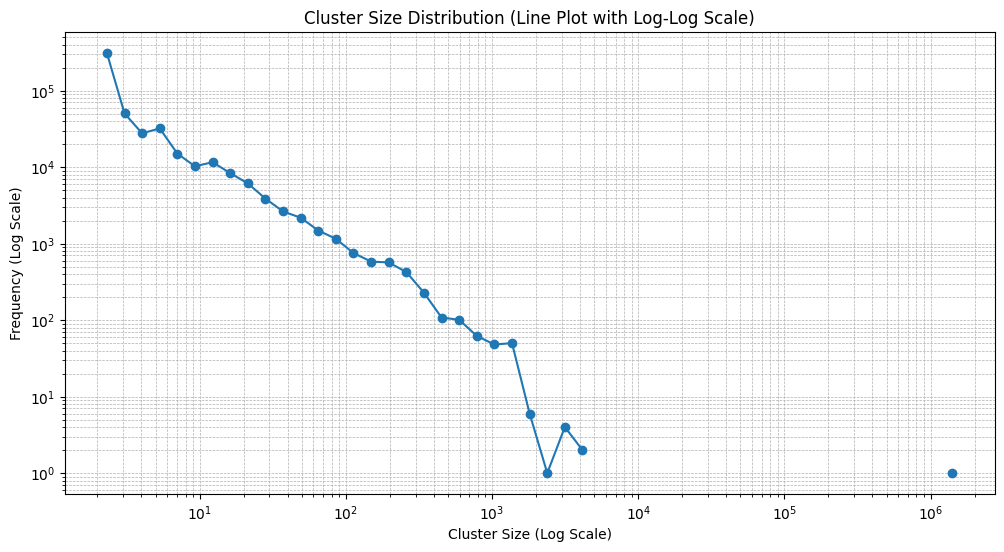

In [6]:
ww1_clusterer = blocksci.cluster.CoinjoinClusterManager("/mnt/anal/clustering/wasabi1_out_threshold/", chain)
%time ww1_clusters = [cluster for cluster in ww1_clusterer.clusters() if cluster.address_count() > 1]
compute_log_log_graph(ww1_clusters)

# graphs and stuff

- number of clusters (=1, >= 1) for WW1, WW2, SW (separately)
- histogram of size of clusters
- interpretability of cluster members (why they are together, can you spot incorrect clusters?)
- How many addresses are outside cj-related scope (k-dist from cjtxs, k=1,2,3)
- For each cjtx: annotate outputs/inputs with cluster_id

## Coinjoin Transactions

Filtering and graphs related to coinjoins

In [9]:
ww2_coinjoins = chain.filter_coinjoin_txes(0, len(chain), "ww2")
ww1_coinjoins = chain.filter_coinjoin_txes(0, len(chain), "ww1")
wp_coinjoins = chain.filter_coinjoin_txes(0, len(chain), "wp")

### Traverses